In [ ]:
!pip install tensorflow tensorflow_decision_forests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 78.1 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_decision_forests as tfdf

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 221.csv to 221.csv
Saving 230.csv to 230.csv


In [ ]:
# Displaying first 5 rows of each dataset
patient_221=pd.read_csv('221.csv')
print("Patient 221 Data:")
print(patient_221.head())
print("\n")
patient_230=pd.read_csv('230.csv')
print("Patient 230 Data:")
print(patient_230.head())

Patient 221 Data:
   RESP  BP-S  BP-D  SpO2  HR  PULSE  Anomaly
0    28    81   120    98  74     73        0
1    29    81   120    98  74     73        0
2    30    81   120    98  74     73        0
3    30    81   120    99  74     73        0
4    29    81   120    99  73     73        0


Patient 230 Data:
   RESP  BP-S  BP-D  SpO2  HR  PULSE  Anomaly
0    15    54    73    97  72     71        0
1    15    54    73    97  72     71        0
2    15    54    73    97  72     71        0
3    15    54    73    97  72     71        0
4    15    55    74    97  72     71        0


In [ ]:
# Summary Statistics
print("\nSummary Statistics for Patient 221:")
print(patient_221.describe())

print("\nSummary Statistics for Patient 230:")
print(patient_230.describe())


Summary Statistics for Patient 221:
               RESP          BP-S          BP-D          SpO2            HR  \
count  24999.000000  24999.000000  24999.000000  24999.000000  24999.000000   
mean      23.763951     83.889756    121.411656     99.041282     88.562342   
std        4.492832      4.746617      8.966590      1.304528      9.592311   
min        0.000000     66.000000     88.000000      0.000000      0.000000   
25%       21.000000     81.000000    114.000000     98.000000     81.000000   
50%       23.000000     83.000000    121.000000     99.000000     88.000000   
75%       26.000000     87.000000    129.000000    100.000000     95.000000   
max       42.000000    127.000000    170.000000    100.000000    120.000000   

              PULSE       Anomaly  
count  24999.000000  24999.000000  
mean      87.975439      0.065683  
std        9.219837      0.247731  
min        0.000000      0.000000  
25%       81.000000      0.000000  
50%       88.000000      0.000000  

In [ ]:
# Missing Values
print("\nMissing Values in Patient 221 Data:")
print(patient_221.isnull().sum())

print("\nMissing Values in Patient 230 Data:")
print(patient_230.isnull().sum())


Missing Values in Patient 221 Data:
RESP       0
BP-S       0
BP-D       0
SpO2       0
HR         0
PULSE      0
Anomaly    0
dtype: int64

Missing Values in Patient 230 Data:
RESP       0
BP-S       0
BP-D       0
SpO2       0
HR         0
PULSE      0
Anomaly    0
dtype: int64


In [ ]:
# Data Type and Non-NULL Count
print("\nInfo for Patient 221 Data:")
print(patient_221.info())

print("\nInfo for Patient 230 Data:")
print(patient_230.info())


Info for Patient 221 Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RESP     24999 non-null  int64
 1   BP-S     24999 non-null  int64
 2   BP-D     24999 non-null  int64
 3   SpO2     24999 non-null  int64
 4   HR       24999 non-null  int64
 5   PULSE    24999 non-null  int64
 6   Anomaly  24999 non-null  int64
dtypes: int64(7)
memory usage: 1.3 MB
None

Info for Patient 230 Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RESP     25000 non-null  int64
 1   BP-S     25000 non-null  int64
 2   BP-D     25000 non-null  int64
 3   SpO2     25000 non-null  int64
 4   HR       25000 non-null  int64
 5   PULSE    25000 non-null  int64
 6   Anomaly  25000 non-null  int64
dtypes: int64(7)
memory usage: 1.3 MB

In [ ]:
# Feature Engineering: Mean BP
patient_221['Mean_BP'] = (patient_221['BP-S'] + patient_221['BP-D']) / 2
patient_230['Mean_BP'] = (patient_230['BP-S'] + patient_230['BP-D']) / 2

print("Feature Engineered Data for Patient 221:")
print(patient_221.head())

print("\nFeature Engineered Data for Patient 230:")
print(patient_230.head())

Feature Engineered Data for Patient 221:
   RESP  BP-S  BP-D  SpO2  HR  PULSE  Anomaly  Mean_BP
0    28    81   120    98  74     73        0    100.5
1    29    81   120    98  74     73        0    100.5
2    30    81   120    98  74     73        0    100.5
3    30    81   120    99  74     73        0    100.5
4    29    81   120    99  73     73        0    100.5

Feature Engineered Data for Patient 230:
   RESP  BP-S  BP-D  SpO2  HR  PULSE  Anomaly  Mean_BP
0    15    54    73    97  72     71        0     63.5
1    15    54    73    97  72     71        0     63.5
2    15    54    73    97  72     71        0     63.5
3    15    54    73    97  72     71        0     63.5
4    15    55    74    97  72     71        0     64.5


In [ ]:
# Removing BP-S and BP-D and keeping Mean_BP in Feature Column
patient_221 = patient_221.drop(columns=['BP-S', 'BP-D'])
print(patient_221.head())
patient_230 = patient_230.drop(columns=['BP-S', 'BP-D'])
print(patient_230.head())

   RESP  SpO2  HR  PULSE  Anomaly  Mean_BP
0    28    98  74     73        0    100.5
1    29    98  74     73        0    100.5
2    30    98  74     73        0    100.5
3    30    99  74     73        0    100.5
4    29    99  73     73        0    100.5
   RESP  SpO2  HR  PULSE  Anomaly  Mean_BP
0    15    97  72     71        0     63.5
1    15    97  72     71        0     63.5
2    15    97  72     71        0     63.5
3    15    97  72     71        0     63.5
4    15    97  72     71        0     64.5


In [ ]:
# Patient 221
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.tree import _tree as ctree
from sklearn.tree import DecisionTreeRegressor

# Segregating attributes to feature columns and target variable
feature_cols = ["RESP", "Mean_BP", "SpO2", "HR", "PULSE"]
X_221 = patient_221[feature_cols]
y_221 = patient_221['Anomaly']

X_train_221, X_test_221, y_train_221, y_test_221 = train_test_split(X_221, y_221, test_size=0.3, random_state=42) # 70% training and 30% test

In [ ]:
# Patient 230
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.tree import _tree as ctree
from sklearn.tree import DecisionTreeRegressor

# Segregating feature columns and target variable
feature_cols = ["RESP", "Mean_BP", "SpO2", "HR", "PULSE"]
X_230 = patient_230[feature_cols]
y_230 = patient_230['Anomaly']

X_train_230, X_test_230, y_train_230, y_test_230 = train_test_split(X_230, y_230, test_size=0.3, random_state=42) # 70% training and 30% test

In [ ]:
from collections import Counter
import numpy as np
class Node:
    def __init__(self, feature=None, value=None, results=None, true_branch=None, false_branch=None):
        self.feature = feature  # Feature to split on
        self.value = value      # Value of the feature to split on
        self.results = results  # Stores class labels if node is a leaf node
        self.true_branch = true_branch  # Branch for values that are True for the feature
        self.false_branch = false_branch  # Branch for values that are False for the feature
def entropy(data):
	counts = np.bincount(data)
	probabilities = counts / len(data)
	entropy = -np.sum([p * np.log2(p) for p in probabilities if p > 0])
	return entropy
def split_data(X, y, feature, value):
	true_indices = np.where(X[:, feature] <= value)[0]
	false_indices = np.where(X[:, feature] > value)[0]
	true_X, true_y = X[true_indices], y[true_indices]
	false_X, false_y = X[false_indices], y[false_indices]
	return true_X, true_y, false_X, false_y
def build_tree(X, y):
	if len(set(y)) == 1:
		return Node(results=y[0])

	best_gain = 0
	best_criteria = None
	best_sets = None
	n_features = X.shape[1]

	current_entropy = entropy(y)

	for feature in range(n_features):
		feature_values = set(X[:, feature])
		for value in feature_values:
			true_X, true_y, false_X, false_y = split_data(X, y, feature, value)
			true_entropy = entropy(true_y)
			false_entropy = entropy(false_y)
			p = len(true_y) / len(y)
			gain = current_entropy - p * true_entropy - (1 - p) * false_entropy

			if gain > best_gain:
				best_gain = gain
				best_criteria = (feature, value)
				best_sets = (true_X, true_y, false_X, false_y)

	if best_gain > 0:
		true_branch = build_tree(best_sets[0], best_sets[1])
		false_branch = build_tree(best_sets[2], best_sets[3])
		return Node(feature=best_criteria[0], value=best_criteria[1], true_branch=true_branch, false_branch=false_branch)

	return Node(results=y[0])
def predict(tree, sample):
	#if it is a leaf node
	if tree.results is not None:
		return tree.results
	else:
		branch = tree.false_branch
		if sample[tree.feature] <= tree.value:
			branch = tree.true_branch
		return predict(branch, sample)


In [ ]:
# Patient 221 Custom ID3 Results
from sklearn.metrics import accuracy_score

X = patient_221.drop(columns=['Anomaly']).values
y = patient_221['Anomaly'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
tree = build_tree(X_train, y_train)
y_pred = [predict(tree, x) for x in X_test]
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Custom ID3 model for Patient 221: {accuracy}")

Accuracy of Custom ID3 model for Patient 221: 0.9930666666666667


In [ ]:
# Patient 221 Built-in Scikit-Learn's DecisionTreeClassifier ID3 Results
ID3_classifier = DecisionTreeClassifier(criterion="entropy", random_state=42)
ID3_classifier.fit(X_train_221, y_train_221)
ID3_predictions_221 = ID3_classifier.predict(X_test_221)
print(f"Accuracy of Built-In ID3 model for Patient 221: {np.mean(ID3_predictions_221 == y_test_221)}")

Accuracy of Built-In ID3 model for Patient 221: 0.9941333333333333


In [ ]:
# Patient 230 Built-in Scikit-Learn's DecisionTreeClassifier ID3 Results
ID3_classifier = DecisionTreeClassifier(criterion="entropy", random_state=42)
ID3_classifier.fit(X_train_230, y_train_230)
ID3_predictions_230 = ID3_classifier.predict(X_test_230)
print(f"Accuracy of Built-In ID3 model for Patient 230: {np.mean(ID3_predictions_230 == y_test_230)}")

Accuracy of Built-In ID3 model for Patient 230: 0.9962666666666666


In [ ]:
# Patient 230 Custom ID3 Results
from sklearn.metrics import accuracy_score

X = patient_230.drop(columns=['Anomaly']).values
y = patient_230['Anomaly'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
tree = build_tree(X_train, y_train)
y_pred = [predict(tree, x) for x in X_test]
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Custom ID3 model for Patient 230: {accuracy}")

Accuracy of Custom ID3 model for Patient 230: 0.9961333333333333


In [ ]:
# Patient 221 Built-in Scikit-Learn's DecisionTreeClassifier CART Results
cart_classifier = DecisionTreeClassifier(random_state=42)
cart_classifier.fit(X_train_221, y_train_221)
cart_predictions_221 = cart_classifier.predict(X_test_221)
print(f"Accuracy of Built-In Scikit-Learn's DecisionTreeClassifie CART model for Patient 221: {np.mean(cart_predictions_221 == y_test_221)}")

Accuracy of Built-In Scikit-Learn's DecisionTreeClassifie CART model for Patient 221: 0.9924


In [ ]:
# Patient 221 TensorFlow CartModel CART Results
import tensorflow_decision_forests as tfdf
import pandas as pd
dataset = patient_221
tf_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(dataset, label="Anomaly")
model = tfdf.keras.CartModel()
model.fit(tf_dataset)
print(model.summary())

Use /tmp/tmpn1bej0h2 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:13.454846. Found 24999 examples.
Training model...
Model trained in 0:00:00.237458
Compiling model...
Model compiled.
Model: "cart_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (5):
	HR
	Mean_BP
	PULSE
	RESP
	SpO2

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.      "HR"  1.000000 ################
    2. "Mean_BP"  0.438095 #####
    3.   "PULSE"  0.162544 
    4.    "SpO2"  0.160279 
    5.    "RESP"  0.158076 

Variable Importance: NUM_AS_ROOT:
    1. "HR"  1.000000 

Variable Importance: NUM_NODES:
    1. "Mean_BP" 14.000000 ###########

In [ ]:
# Patient 230 Built-in Scikit-Learn's DecisionTreeClassifier CART Results
cart_classifier = DecisionTreeClassifier(random_state=42)
cart_classifier.fit(X_train_230, y_train_230)
cart_predictions_230 = cart_classifier.predict(X_test_230)
print(f"Accuracy of Built-In Scikit-Learn's DecisionTreeClassifie CART model for Patient 230: {np.mean(cart_predictions_230 == y_test_230)}")

Accuracy of Built-In Scikit-Learn's DecisionTreeClassifie CART model for Patient 230: 0.9950666666666667


In [ ]:
# Patient 230 TensorFlow CartModel CART Results
import tensorflow_decision_forests as tfdf
import pandas as pd
dataset = patient_230
tf_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(dataset, label="Anomaly")
model = tfdf.keras.CartModel()
model.fit(tf_dataset)
print(model.summary())

Use /tmp/tmpvja8zn7s as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.649399. Found 25000 examples.
Training model...
Model trained in 0:00:00.280371
Compiling model...
Model compiled.
Model: "cart_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (5):
	HR
	Mean_BP
	PULSE
	RESP
	SpO2

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.    "SpO2"  1.000000 ################
    2.      "HR"  0.345588 ###
    3. "Mean_BP"  0.238579 #
    4.    "RESP"  0.208889 #
    5.   "PULSE"  0.140719 

Variable Importance: NUM_AS_ROOT:
    1. "SpO2"  1.000000 

Variable Importance: NUM_NODES:
    1. "Mean_BP" 15.000000 #######

In [ ]:
#calculating metrics for patient 230 ----->sklearn cart model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

# Accuracy
accuracy_230_cart = accuracy_score(y_test_230, cart_predictions_230)
print(f"for patient 230-->\n")
print(f"Accuracy : {accuracy_230_cart}")

# Precision
precision_230_cart = precision_score(y_test_230, cart_predictions_230)
print(f"Precision: {precision_230_cart}")

# Recall
recall_230_cart = recall_score(y_test_230,cart_predictions_230)
print(f"Recall: {recall_230_cart}")

# F1-Score
f1_230_cart = f1_score(y_test_230, cart_predictions_230)
print(f"F1-Score: {f1_230_cart}")

for patient 230-->

Accuracy : 0.9950666666666667
Precision: 0.9186991869918699
Recall: 0.9300411522633745
F1-Score: 0.9243353783231084


In [ ]:
# Analyze the performance of each algorithm on both datasets.
# Compare the results from ID3 and CART, identifying their strengths and weaknesses.
# Write insights based on your analysis, discussing the implications of your findings for decision tree applications.

#calculating metrics for patient 221 ----->sklearn cart model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

# Accuracy
accuracy_221_cart = accuracy_score(y_test_221, cart_predictions_221)
print(f"for patient 221-->\n")
print(f"Accuracy : {accuracy_221_cart}")

# Precision
precision_221_cart = precision_score(y_test_221, cart_predictions_221)
print(f"Precision: {precision_221_cart}")

# Recall
recall_221_cart = recall_score(y_test_221,cart_predictions_221)
print(f"Recall: {recall_221_cart}")

# F1-Score
f1_221_cart = f1_score(y_test_221, cart_predictions_221)
print(f"F1-Score: {f1_221_cart}")


for patient 221-->

Accuracy : 0.9924
Precision: 0.92
Recall: 0.9698795180722891
F1-Score: 0.9442815249266862


In [ ]:
#calculating metrics for patient 230 ----->sklearn ID3 model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

# Accuracy
accuracy_230_ID3 = accuracy_score(y_test_230, ID3_predictions_230)
print(f"for patient 230-->\n")
print(f"Accuracy : {accuracy_230_ID3}")

# Precision
precision_230_ID3 = precision_score(y_test_230,  ID3_predictions_230)
print(f"Precision: {precision_230_ID3}")

# Recall
recall_230_ID3 = recall_score(y_test_230, ID3_predictions_230)
print(f"Recall: {recall_230_ID3}")

# F1-Score
f1_230_ID3 = f1_score(y_test_230, ID3_predictions_230)
print(f"F1-Score: {f1_230_ID3}")

for patient 230-->

Accuracy : 0.9962666666666666
Precision: 0.9423868312757202
Recall: 0.9423868312757202
F1-Score: 0.9423868312757202


In [ ]:
#calculating metrics for patient 221 ----->sklearn ID3 model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

# Accuracy
accuracy_221_ID3 = accuracy_score(y_test_221, ID3_predictions_221)
print(f"for patient 221-->\n")
print(f"Accuracy : {accuracy_221_ID3}")

# Precision
precision_221_ID3= precision_score(y_test_221, ID3_predictions_221)
print(f"Precision: {precision_221_ID3}")

# Recall
recall_221_ID3 = recall_score(y_test_221,ID3_predictions_221)
print(f"Recall: {recall_221_ID3}")

# F1-Score
f1_221_ID3 = f1_score(y_test_221,ID3_predictions_221)
print(f"F1-Score: {f1_221_ID3}")


for patient 221-->

Accuracy : 0.9941333333333333
Precision: 0.943359375
Recall: 0.9698795180722891
F1-Score: 0.9564356435643564


In [ ]:
#comparing differnece betweeen the results of both Algorithm
comparison_results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'ID3': [accuracy_221_ID3, precision_221_ID3, recall_221_ID3, f1_221_ID3],
    'CART': [accuracy_221_cart,precision_221_cart, recall_221_cart, f1_221_cart]
})

print(comparison_results)


      Metric       ID3      CART
0   Accuracy  0.994133  0.992400
1  Precision  0.943359  0.920000
2     Recall  0.969880  0.969880
3   F1-Score  0.956436  0.944282


In [ ]:
#comparing differnece betweeen the results of both Algorithm
comparison_results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'ID3': [accuracy_230_ID3, precision_230_ID3, recall_230_ID3, f1_230_ID3],
    'CART': [accuracy_230_cart,precision_230_cart, recall_230_cart, f1_230_cart]
})

print(comparison_results)

      Metric       ID3      CART
0   Accuracy  0.996267  0.995067
1  Precision  0.942387  0.918699
2     Recall  0.942387  0.930041
3   F1-Score  0.942387  0.924335


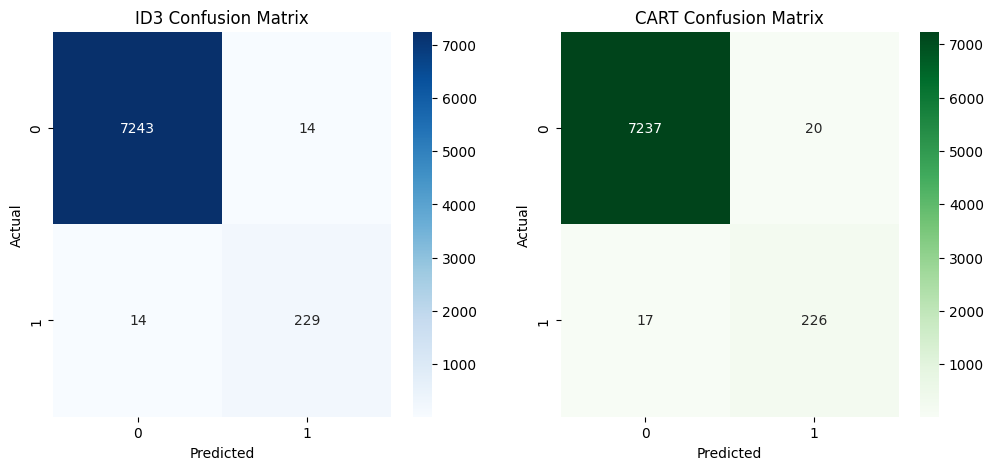

In [ ]:
#confusion matrix for 230
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix for ID3
id3_cm = confusion_matrix(y_test_230, ID3_predictions_230)

# Confusion matrix for CART
cart_cm = confusion_matrix(y_test_230, cart_predictions_230)

# Plot the confusion matrices side-by-side
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot for ID3
sns.heatmap(id3_cm, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("ID3 Confusion Matrix")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

# Plot for CART
sns.heatmap(cart_cm, annot=True, fmt="d", cmap="Greens", ax=ax[1])
ax[1].set_title("CART Confusion Matrix")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

plt.show()


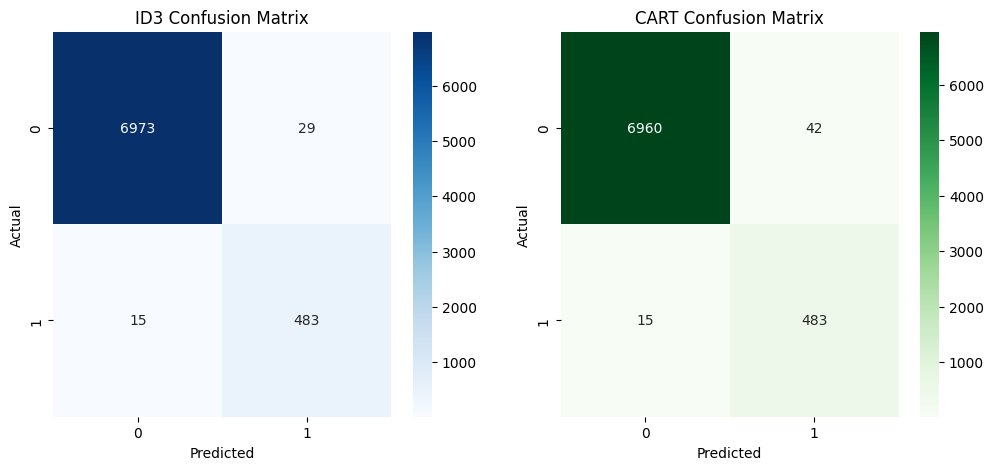

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix for ID3
id3_cm = confusion_matrix(y_test_221, ID3_predictions_221)

# Confusion matrix for CART
cart_cm = confusion_matrix(y_test_221, cart_predictions_221)

# Plot the confusion matrices side-by-side
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot for ID3
sns.heatmap(id3_cm, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("ID3 Confusion Matrix")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

# Plot for CART
sns.heatmap(cart_cm, annot=True, fmt="d", cmap="Greens", ax=ax[1])
ax[1].set_title("CART Confusion Matrix")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

plt.show()


# Comparison between ID3 and CART
**Accuracy:** ID3 has a slightly higher accuracy (0.996267) compared to CART (0.995067). This indicates that ID3 performs marginally better in terms of overall correctness in predictions.

**Precision:**
ID3 also has a higher precision (0.942387) compared to CART (0.918699). Higher precision means that when ID3 predicts a positive class, it is more likely to be correct than when CART makes the same prediction. This suggests that ID3 has a better ability to correctly identify true positives.

**Recall:**
ID3’s recall (0.942387) is very close to CART’s recall (0.930041), with ID3 slightly outperforming CART. This indicates that ID3 is slightly better at identifying all relevant positive cases in the dataset.

**F1-Score:**
The F1-Score for ID3 (0.942387) is higher than that of CART (0.924335). The F1-Score is a measure that combines precision and recall into a single metric. A higher F1-Score for ID3 suggests a better balance between precision and recall.

In [ ]:
# Patient 221 Tensorflow Decision Forests Random Forest Model
import tensorflow as tf
import tensorflow_decision_forests as tfdf
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
feature_cols = ["RESP", "Mean_BP", "SpO2", "HR", "PULSE"]
X_1 = patient_221[feature_cols]
y_1 = patient_221['Anomaly']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.3, random_state=42)

train_ds = tf.data.Dataset.from_tensor_slices((dict(X_train_1), y_train_1)).batch(1000)
test_ds = tf.data.Dataset.from_tensor_slices((dict(X_test_1), y_test_1)).batch(1000)

rf_model = tfdf.keras.RandomForestModel(random_seed=42)
rf_model.fit(train_ds)

evaluation = rf_model.evaluate(test_ds)
print(f"Evaluation: {evaluation}")

print(rf_model.summary())
y_pred_proba = rf_model.predict(test_ds)
yy_pred_proba = y_pred_proba.flatten()
log_loss_value = log_loss(y_test_1, y_pred_proba)
print(f"Default RF Model - Loss: {log_loss_value}")

Use /tmp/tmpxjqzubb2 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.251293. Found 17499 examples.
Training model...
Model trained in 0:00:03.847594
Compiling model...
Model compiled.
8/8 [==============================] - 0s 17ms/step - loss: 0.0000e+00
Evaluation: 0.0
Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (5):
	HR
	Mean_BP
	PULSE
	RESP
	SpO2

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.      "HR"  0.634240 ################
    2. "Mean_BP"  0.412905 ########
    3.   "PULSE"  0.182979 #
    4.    "RESP"  0.141374 
    5.    "SpO2"  0.128743 

Variable Importance: NUM_AS_

In [ ]:
# Visualising Patient 221 Random Forest Model
import tensorflow_decision_forests as tfdf
tfdf.model_plotter.plot_model_in_colab(rf_model, tree_idx=0, max_depth=3)

In [ ]:
# Visualising Hypothesis Space of the Given Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

patient_221_orig=pd.read_csv('221.csv')
patient_230_orig=pd.read_csv('230.csv')

features = ['RESP', 'BP-S', 'BP-D', 'SpO2', 'HR', 'PULSE']
feature_pairs = list(itertools.combinations(features, 2))
print(feature_pairs)

[('RESP', 'BP-S'), ('RESP', 'BP-D'), ('RESP', 'SpO2'), ('RESP', 'HR'), ('RESP', 'PULSE'), ('BP-S', 'BP-D'), ('BP-S', 'SpO2'), ('BP-S', 'HR'), ('BP-S', 'PULSE'), ('BP-D', 'SpO2'), ('BP-D', 'HR'), ('BP-D', 'PULSE'), ('SpO2', 'HR'), ('SpO2', 'PULSE'), ('HR', 'PULSE')]


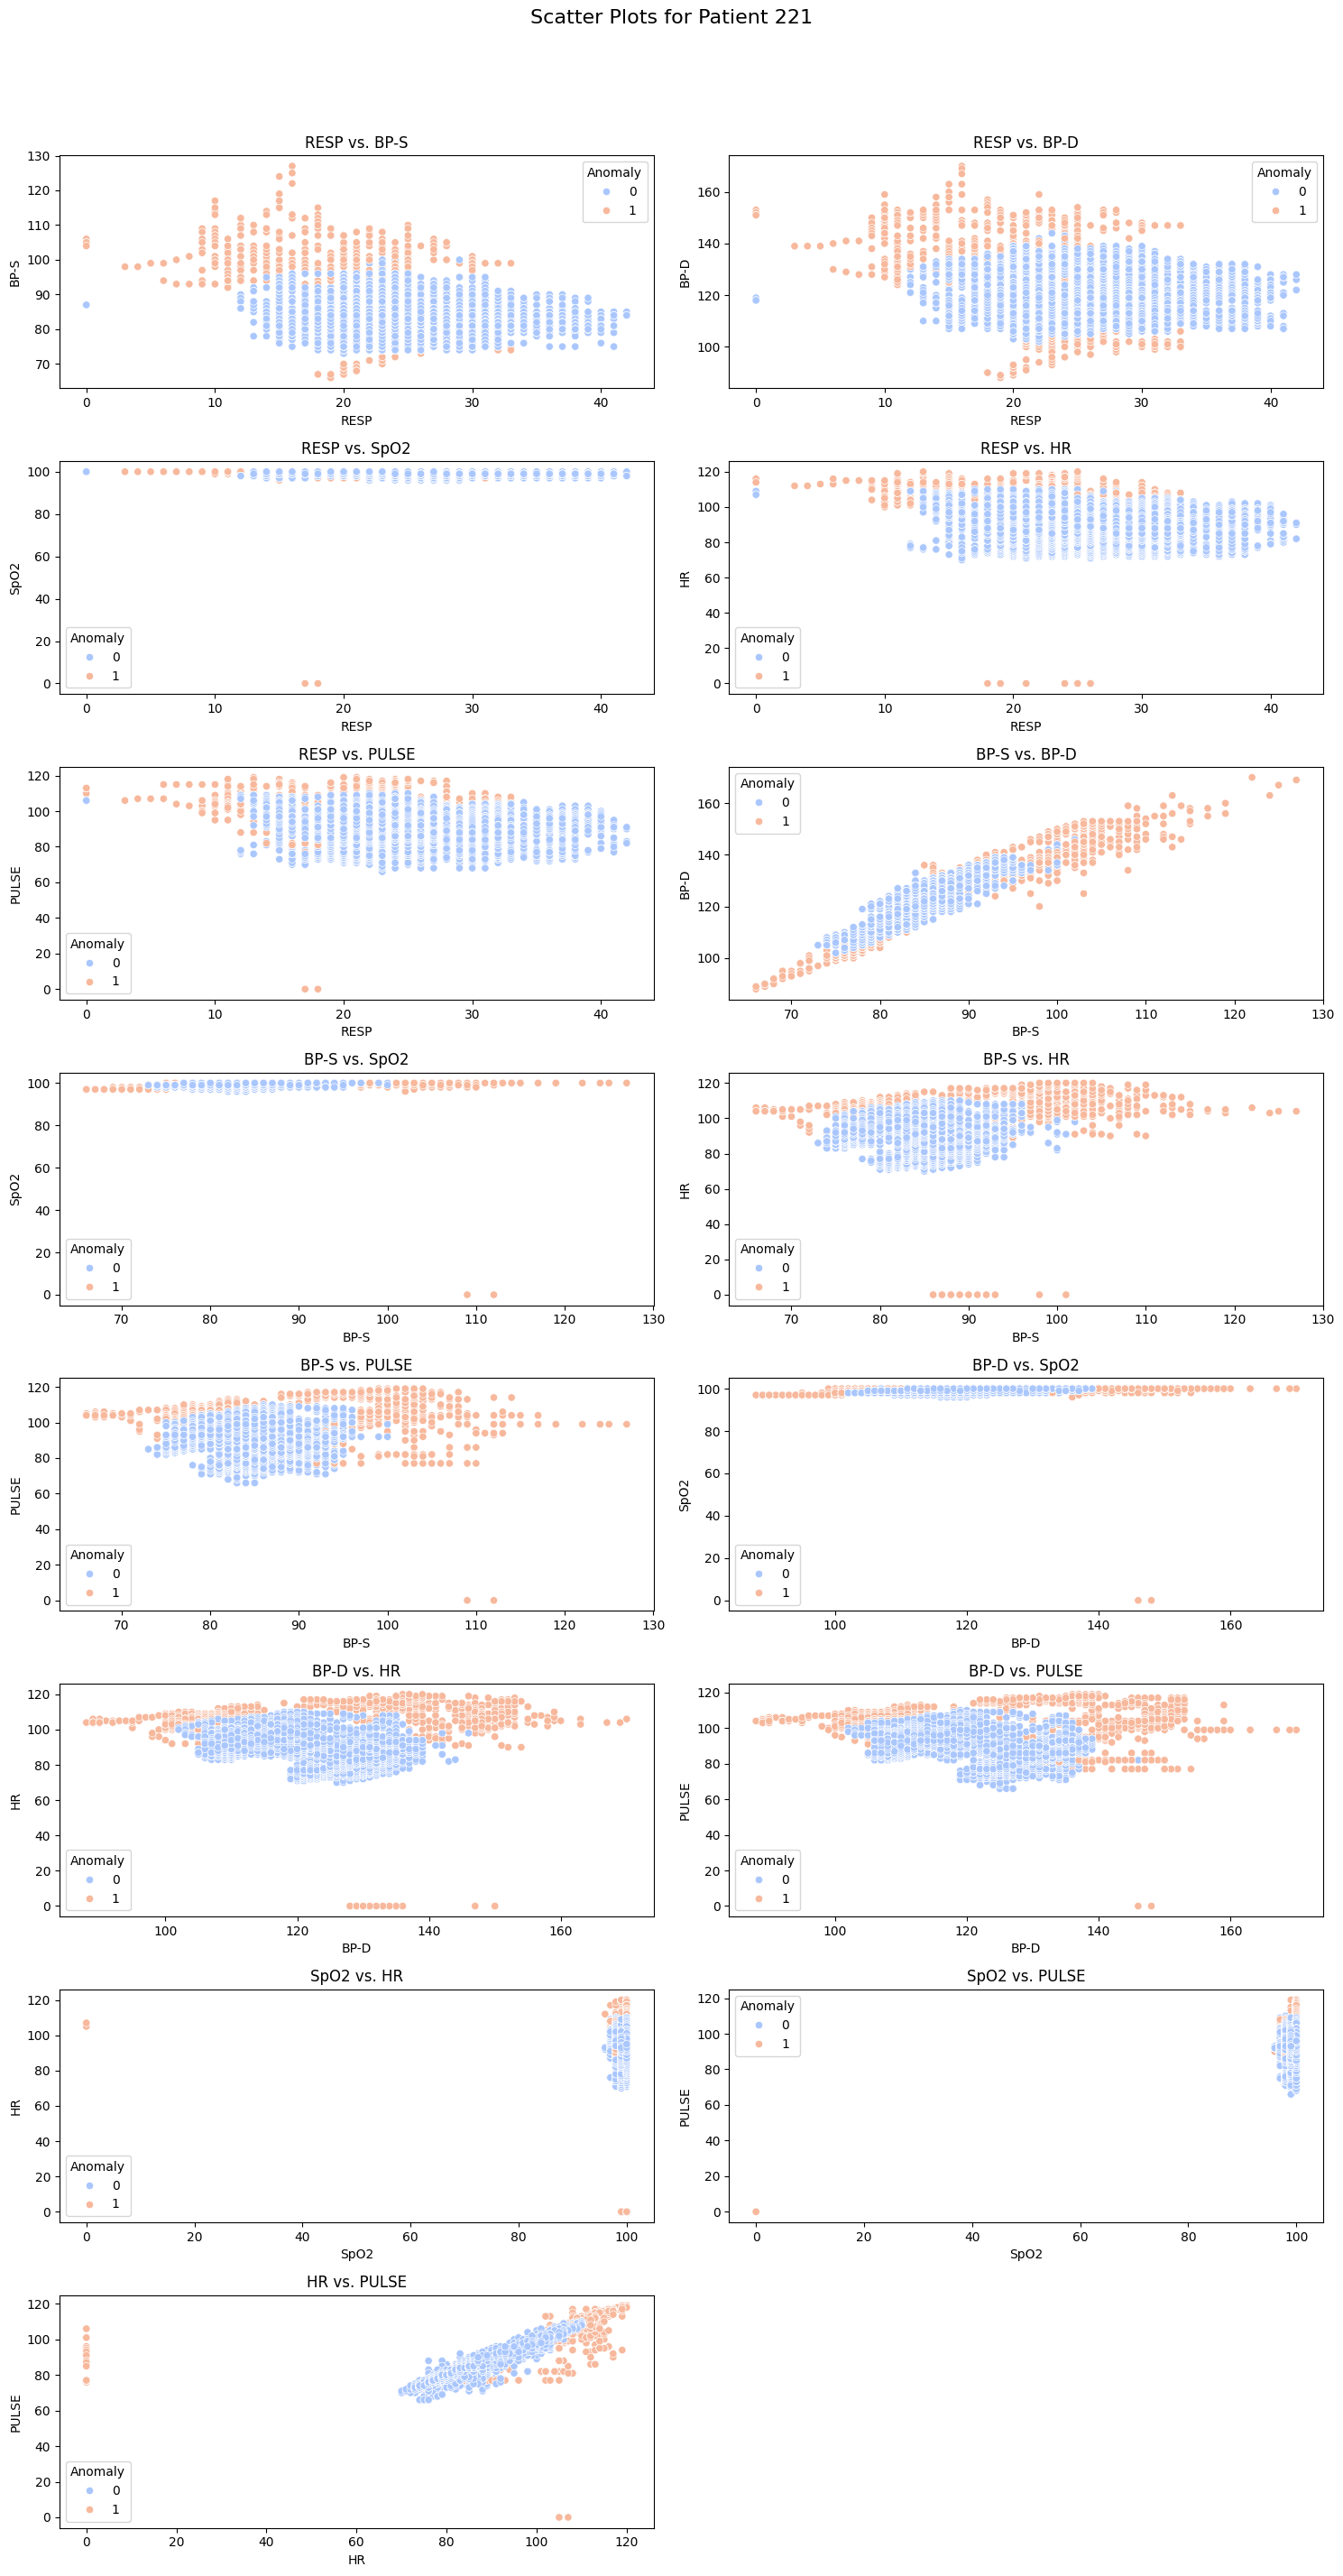

In [ ]:
# Create subplots for Patient 221
plt.figure(figsize=(15, 30))
plt.suptitle('Scatter Plots for Patient 221', fontsize=16)
for i, (x_feature, y_feature) in enumerate(feature_pairs, 1):
    plt.subplot(8, 2, i)
    sns.scatterplot(x=x_feature, y=y_feature, hue='Anomaly', data=patient_221_orig, palette='coolwarm')
    plt.title(f'{x_feature} vs. {y_feature}')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

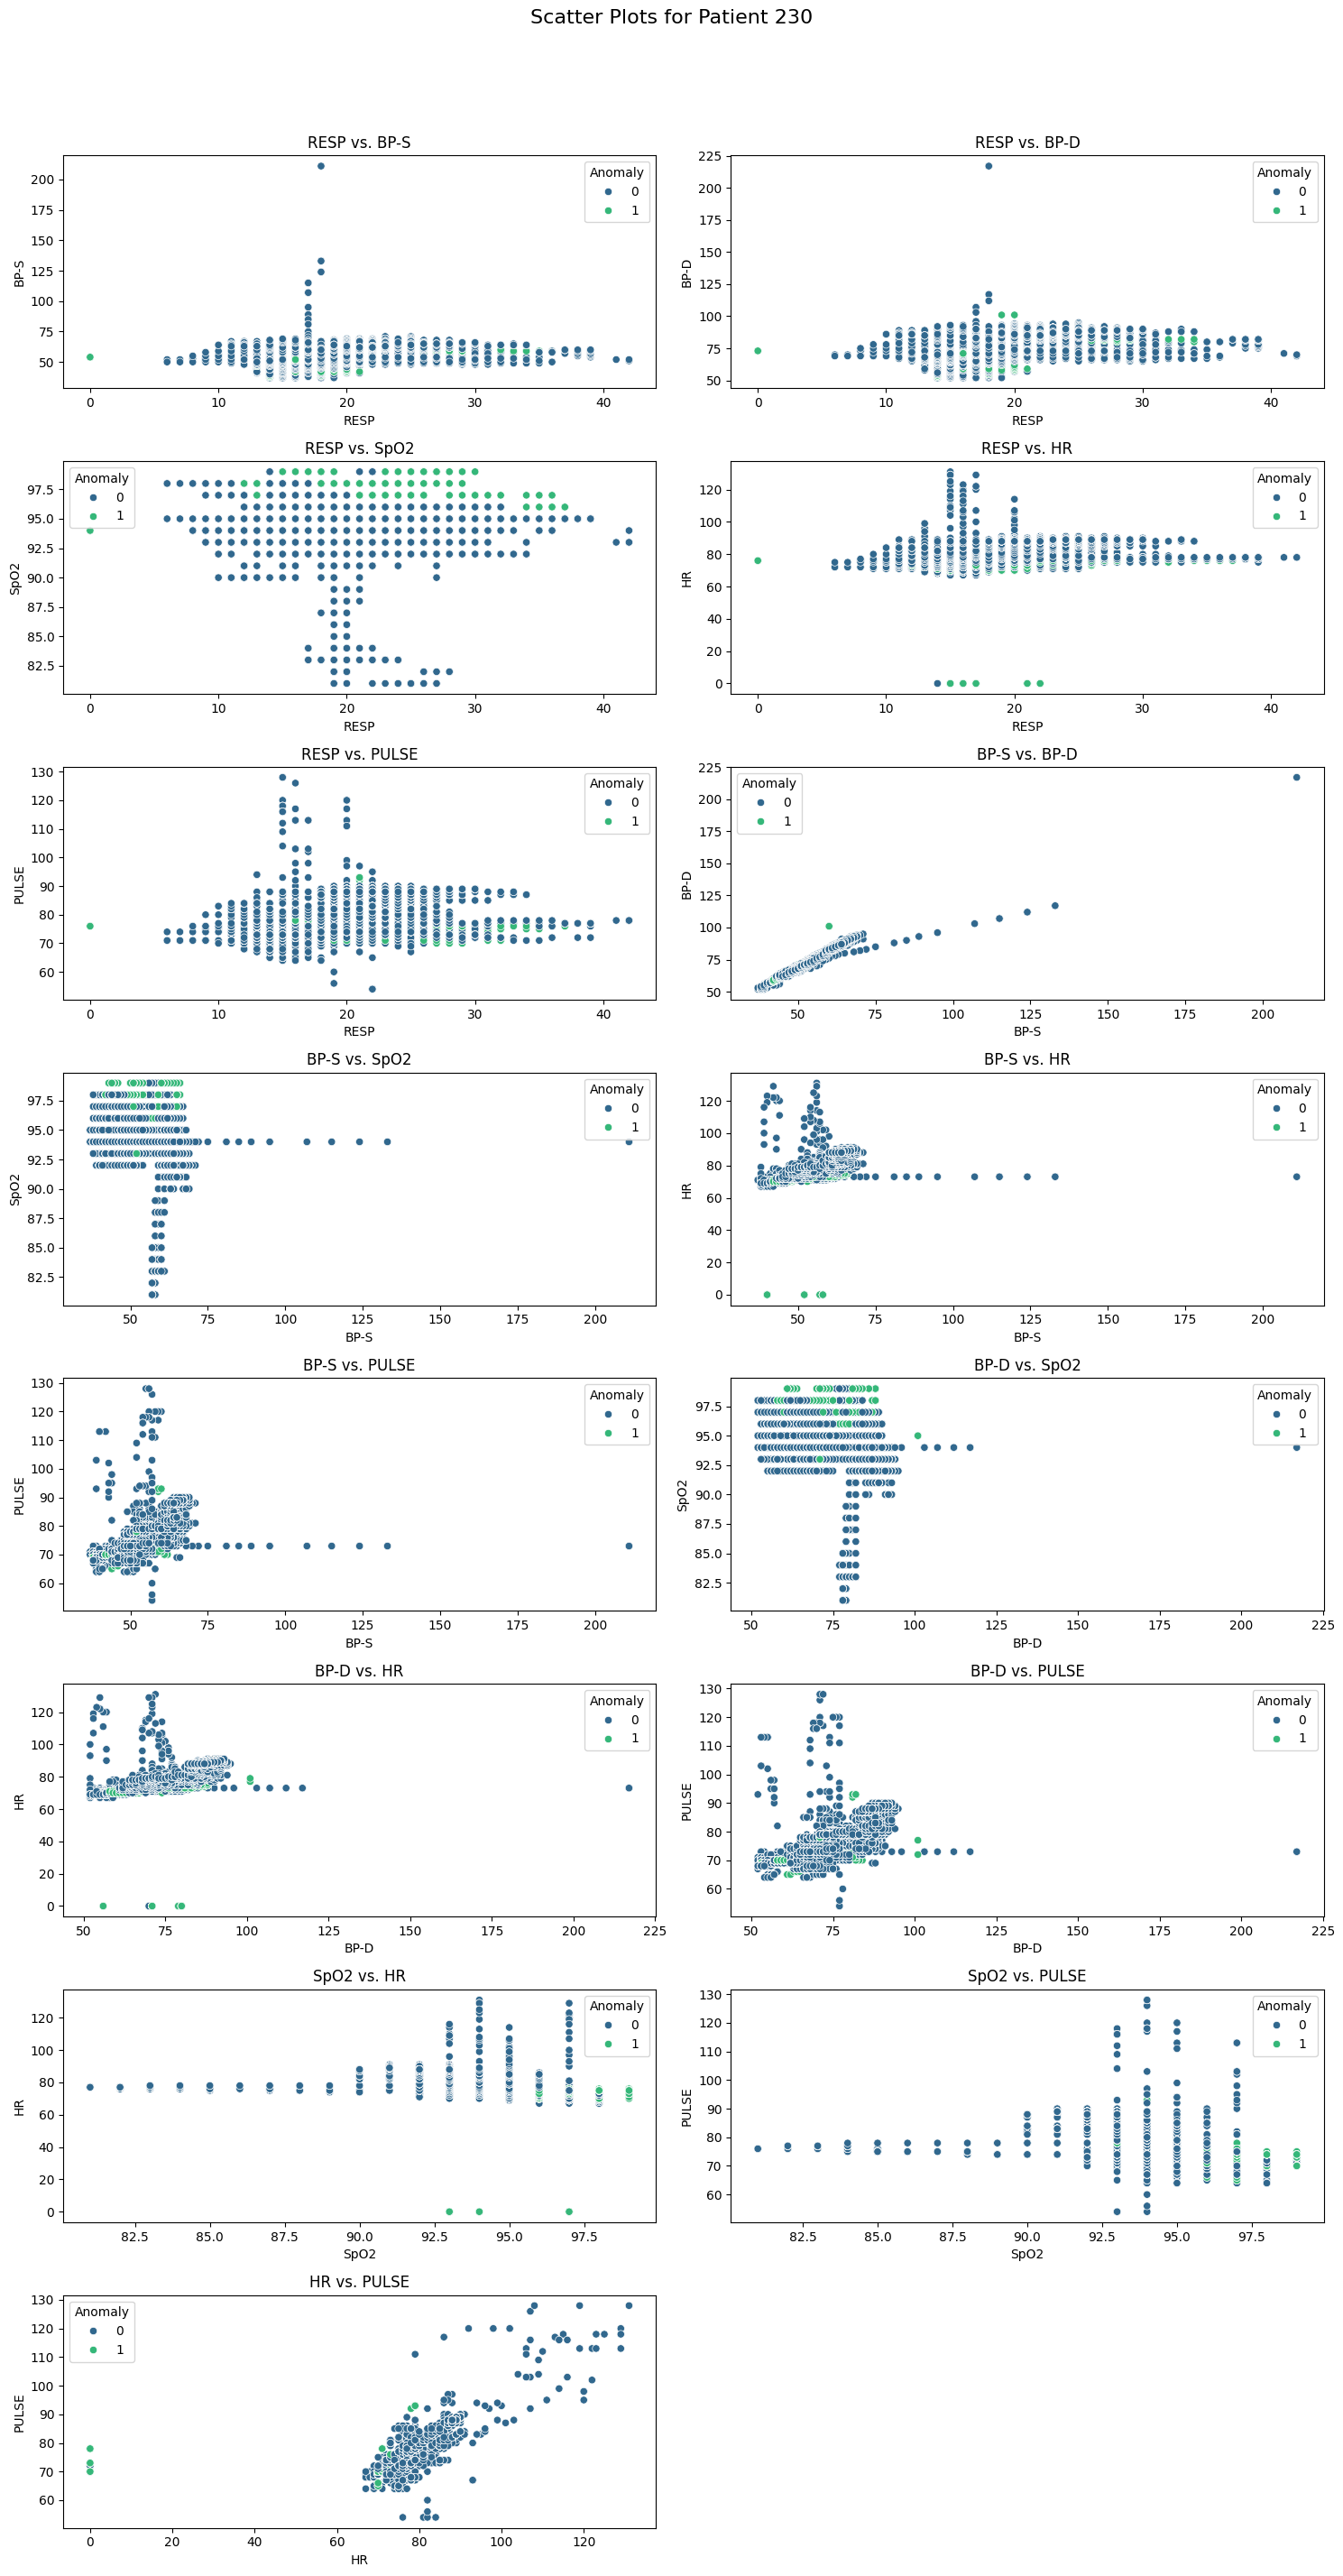

In [ ]:
# Create subplots for Patient 230
plt.figure(figsize=(15, 30))
plt.suptitle('Scatter Plots for Patient 230', fontsize=16)
for i, (x_feature, y_feature) in enumerate(feature_pairs, 1):
    plt.subplot(8, 2, i)
    sns.scatterplot(x=x_feature, y=y_feature, hue='Anomaly', data=patient_230_orig, palette='viridis')
    plt.title(f'{x_feature} vs. {y_feature}')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

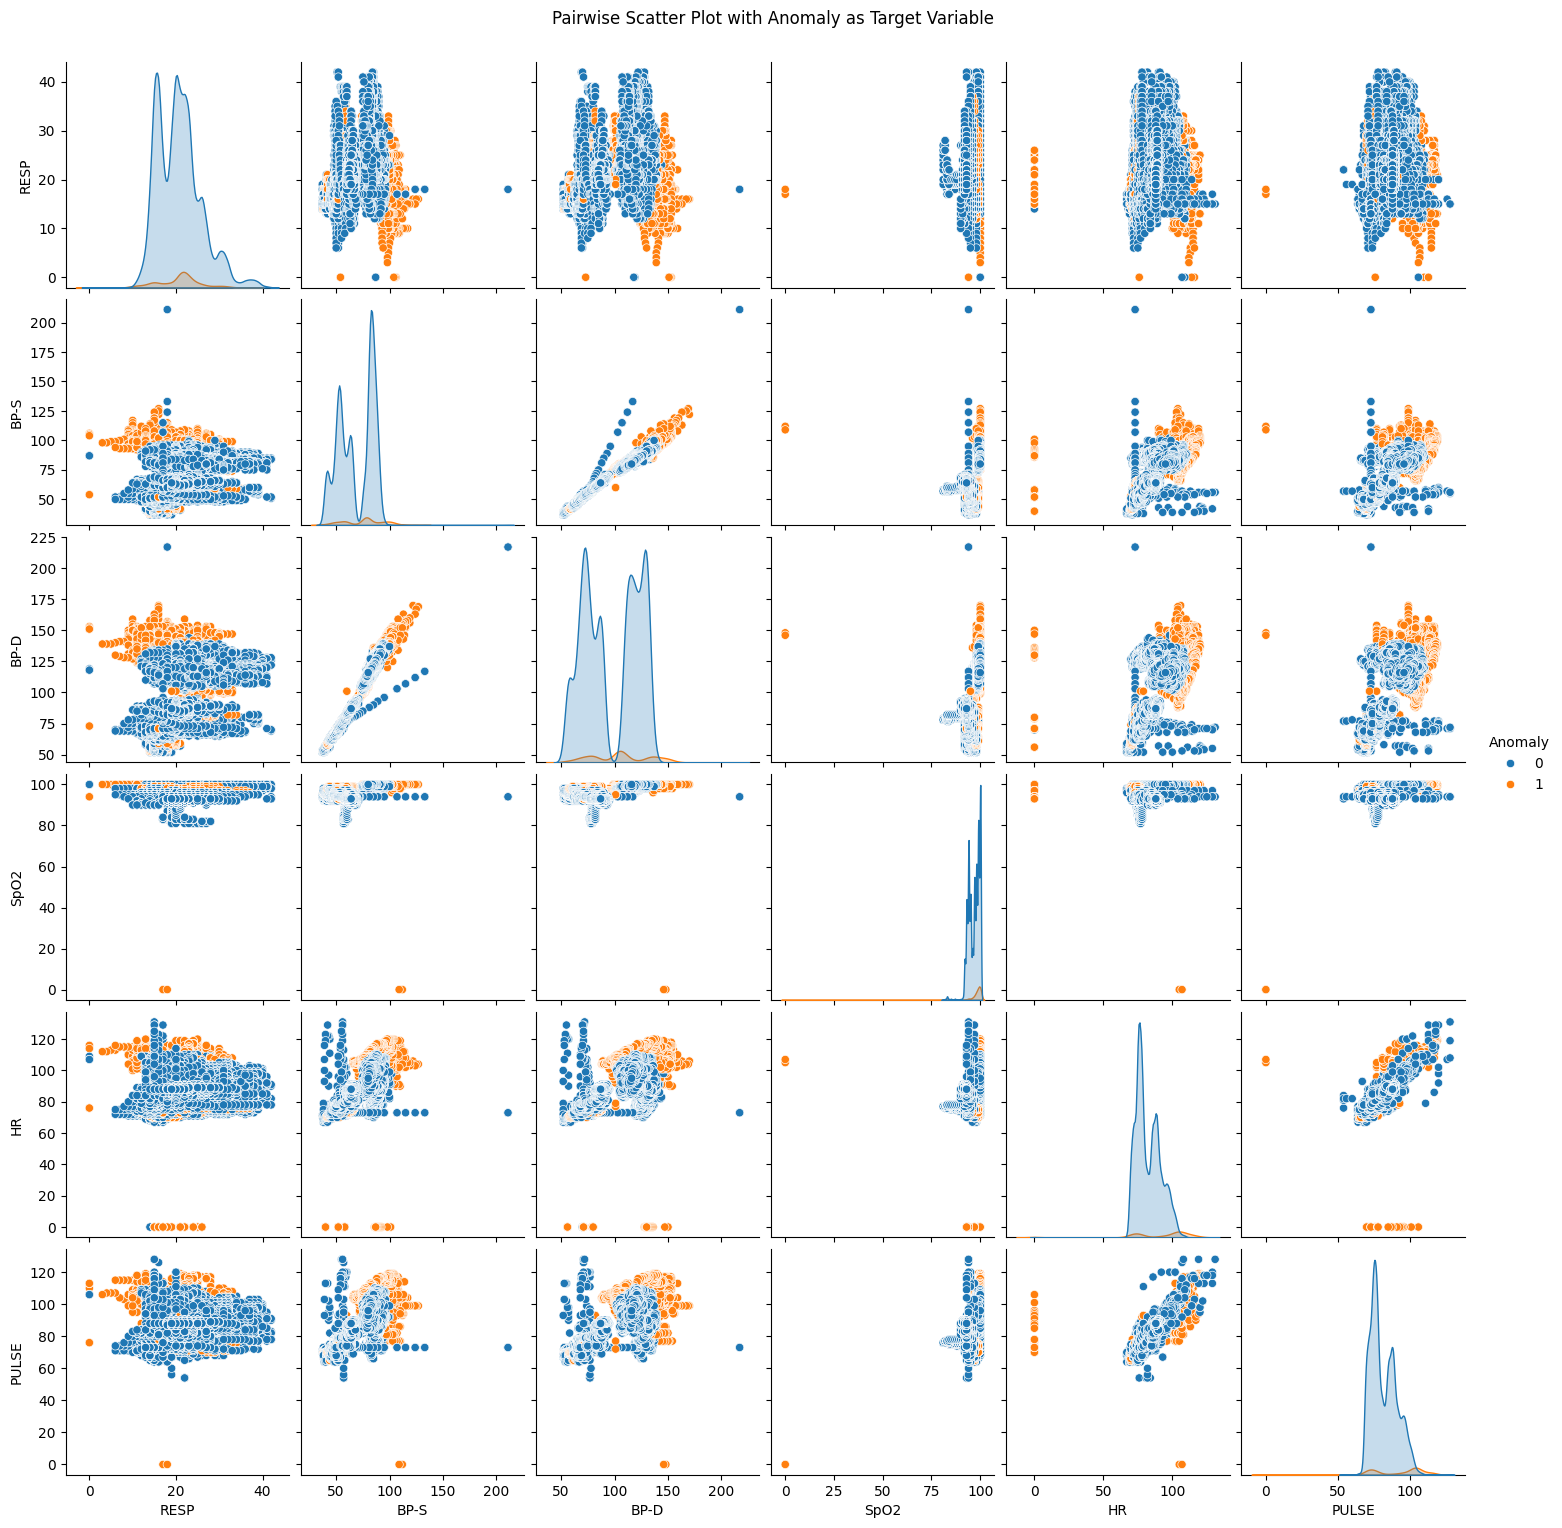

In [ ]:
# Hypothesis Space Visualtion
df = pd.concat([patient_221_orig, patient_230_orig], ignore_index=True)
pp = sns.pairplot(df, hue='Anomaly', diag_kind='kde')
pp.fig.suptitle('Pairwise Scatter Plot with Anomaly as Target Variable', y=1.02)
plt.show()

Use /tmp/tmpdd599uxe as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.435590. Found 17500 examples.
Training model...
Model trained in 0:00:00.100337
Compiling model...
Model compiled.
8/8 [==============================] - 0s 7ms/step
Use /tmp/tmpy_aj30mk as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.676701. Found 17500 examples.
Training model...
Model trained in 0:00:00.155569
Compiling model...
Model compiled.
8/8 [==============================] - 0s 9ms/step
Use /tmp/tmp704le_92 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.606422. Found 17500 examples.
Training model...
Model trained in 0:00:00.120209
Compiling model...
Model compiled.
8/8 [==============================] - 0s 9ms/step
Use /tmp/tmpm8betc08 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.833170. Found 17500 examples.
Training model..

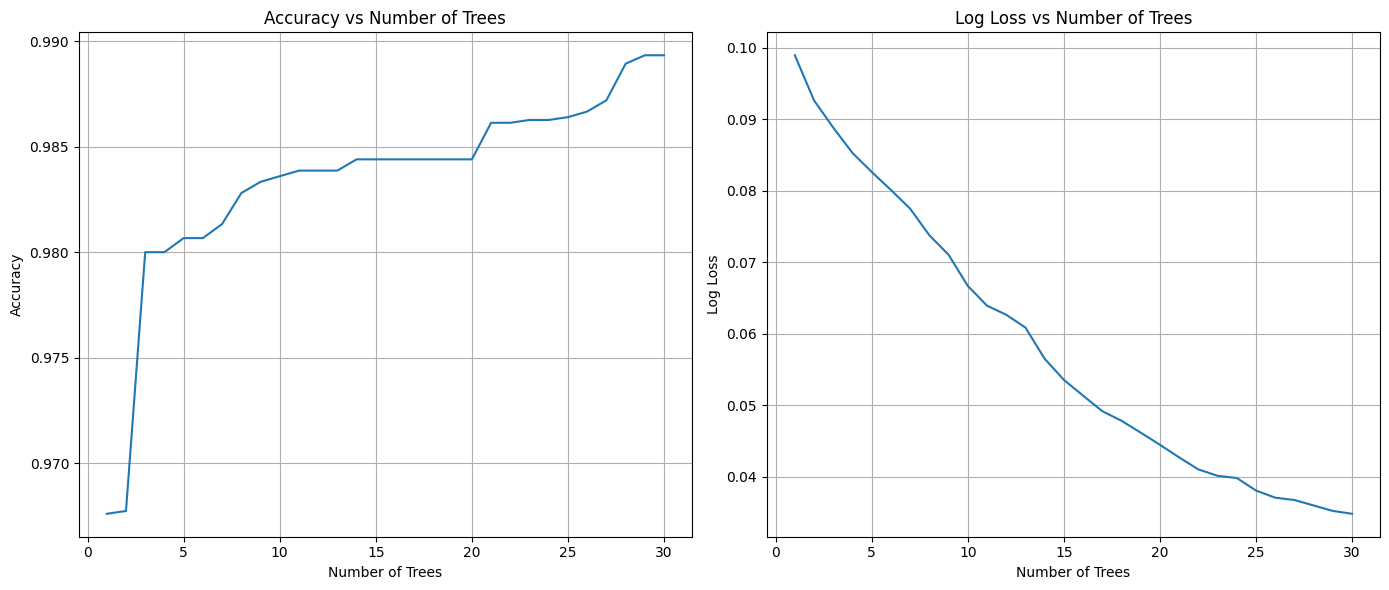

In [ ]:
#Accuracy and LogLoss vs Number of Trees Plot
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss, accuracy_score

trees = np.arange(1, 31, 1)

accuracies = []
log_losses = []

train_ds_2 = train_ds_2.cache()
test_ds_2 = test_ds_2.cache()

for tree in trees:
    gbdt_model1 = tfdf.keras.GradientBoostedTreesModel(num_trees=int(tree), random_seed=42)
    gbdt_model1.fit(train_ds_2)
    gbdt_predictions = gbdt_model1.predict(test_ds_2)

    accuracy = accuracy_score(y_test_2, (gbdt_predictions > 0.5).astype(int))
    logloss = log_loss(y_test_2, gbdt_predictions)

    accuracies.append(accuracy)
    log_losses.append(logloss)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(trees, accuracies)
plt.title('Accuracy vs Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(trees, log_losses)
plt.title('Log Loss vs Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Log Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Patient 230 Tensorflow Gradient Boosted Decision Trees Model
import tensorflow as tf
import tensorflow_decision_forests as tfdf
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score

feature_cols = ["RESP", "Mean_BP", "SpO2", "HR", "PULSE"]
X_2 = patient_230[feature_cols]
y_2 = patient_230['Anomaly']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=42)

train_ds_2 = tf.data.Dataset.from_tensor_slices((dict(X_train_2), y_train_2)).batch(1000)
test_ds_2 = tf.data.Dataset.from_tensor_slices((dict(X_test_2), y_test_2)).batch(1000)

gbdt_model = tfdf.keras.GradientBoostedTreesModel(random_seed=42)
gbdt_model.fit(train_ds_2)

gbdt_predictions = gbdt_model.predict(test_ds_2)
gbdt_predictions_probs= gbdt_model.predict(test_ds_2)

print(gbdt_model.summary());
gbdt_loss = log_loss(y_test_2, gbdt_predictions_probs)
print(f"Default GBDT Model - Loss: {gbdt_loss}")


Use /tmp/tmp18vyxapq as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.308712. Found 17500 examples.
Training model...
Model trained in 0:00:02.305590
Compiling model...
Model compiled.
8/8 [==============================] - 0s 7ms/step
Model: "gradient_boosted_trees_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "GRADIENT_BOOSTED_TREES"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (5):
	HR
	Mean_BP
	PULSE
	RESP
	SpO2

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.    "RESP"  0.367786 ################
    2.      "HR"  0.339939 ############
    3. "Mean_BP"  0.290087 #######
    4.    "SpO2"  0.268891 ####
    5.   "PULSE"  0.225440 

Variable Importance: NUM_AS_ROOT

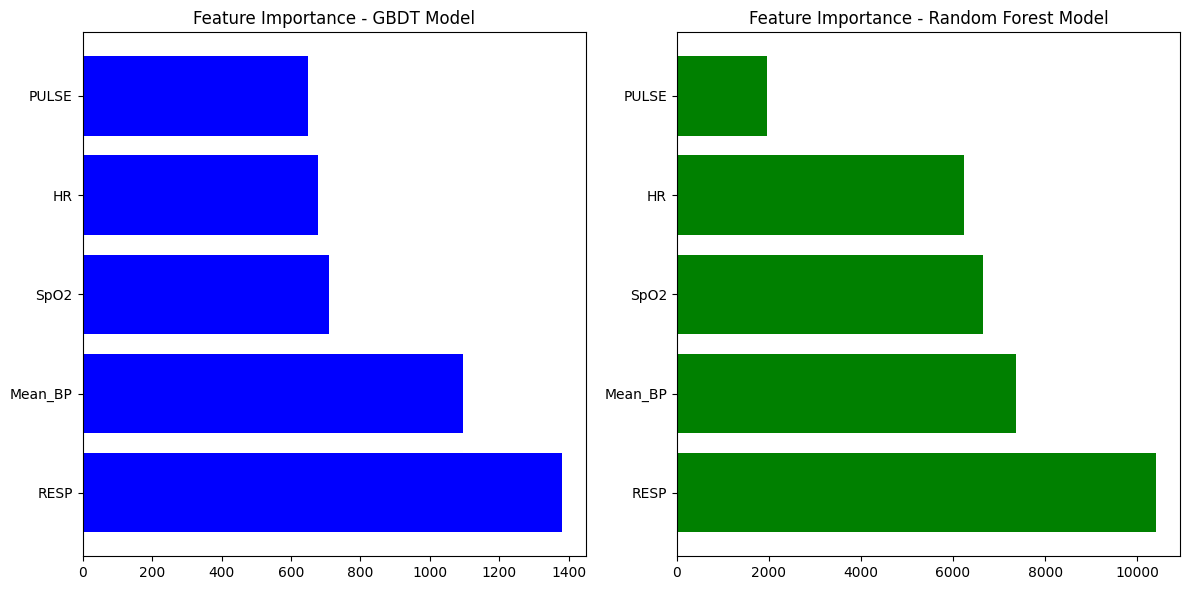

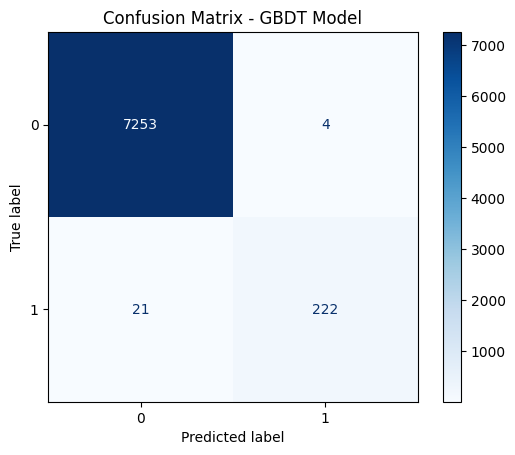

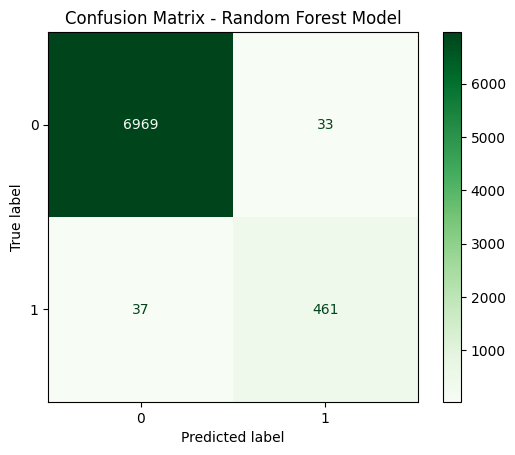

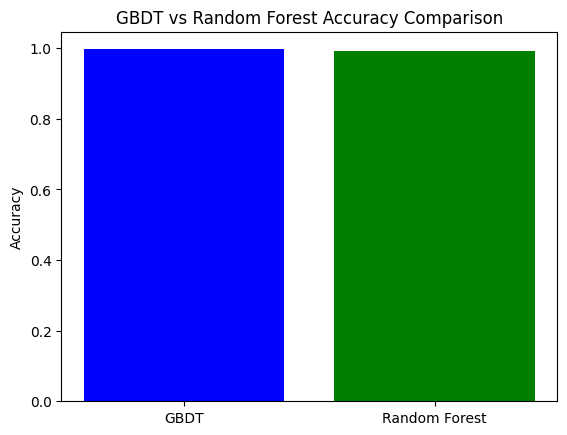

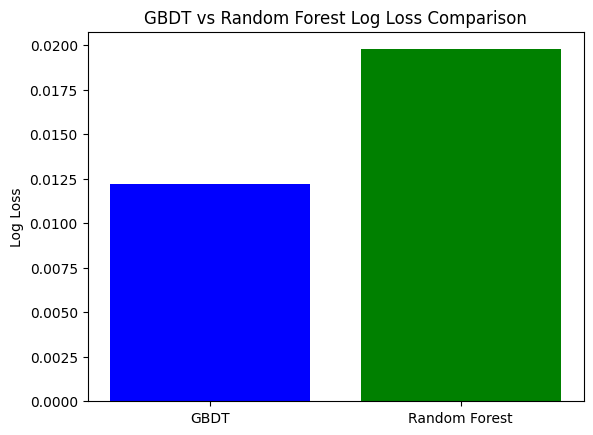

GBDT Model - Accuracy: 0.9966666666666667, Log Loss: 0.012183603683695511
GBDT Model - Precision: 0.9823008849557522, Recall: 0.9135802469135802, F1 Score: 0.9466950959488272
Random Forest Model - Accuracy: 0.9906666666666667, Log Loss: 0.019769165412373717
Random Forest Model - Precision: 0.9331983805668016, Recall: 0.9257028112449799, F1 Score: 0.9294354838709677


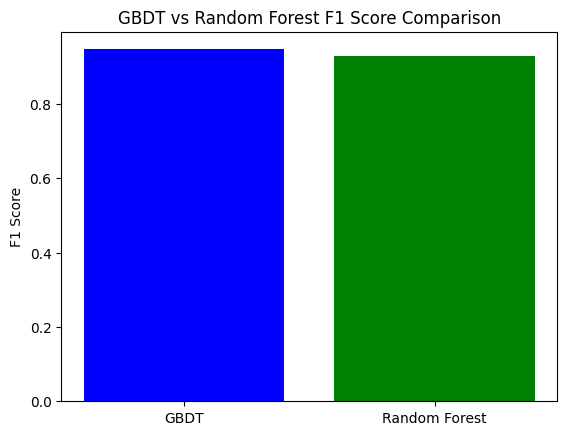

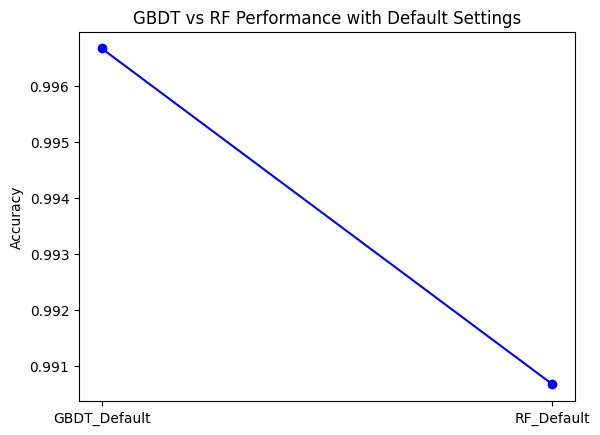

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import numpy as np

colors = {
    'GBDT': 'blue',
    'Random Forest': 'green'
}

# Feature Importance Extraction
gbdt_importances = gbdt_model.make_inspector().variable_importances()
rf_importances = rf_model.make_inspector().variable_importances()

gbdt_importance_values = gbdt_importances.get('NUM_NODES', [])
rf_importance_values = rf_importances.get('NUM_NODES', [])

if not gbdt_importance_values:
    print("Warning: GBDT model does not have 'NUM_NODES' importance available.")
else:
    gbdt_importances_list = [item[1] for item in gbdt_importance_values]

if not rf_importance_values:
    print("Warning: RF model does not have 'NUM_NODES' importance available.")
else:
    rf_importances_list = [item[1] for item in rf_importance_values]

if gbdt_importance_values and rf_importance_values:
    features = X_2.columns
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))


    ax[0].barh(features, gbdt_importances_list, color=colors['GBDT'])
    ax[0].set_title('Feature Importance - GBDT Model')


    ax[1].barh(features, rf_importances_list, color=colors['Random Forest'])
    ax[1].set_title('Feature Importance - Random Forest Model')

    plt.tight_layout()
    plt.show()


gbdt_pred = (gbdt_predictions_probs > 0.5).astype(int)
gbdt_cm = confusion_matrix(y_test_2, gbdt_pred)
gbdt_disp = ConfusionMatrixDisplay(confusion_matrix=gbdt_cm)
gbdt_disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - GBDT Model')
plt.show()


rf_pred = (y_pred_proba > 0.5).astype(int)
rf_cm = confusion_matrix(y_test_1, rf_pred)
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm)
rf_disp.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix - Random Forest Model')
plt.show()


accuracy_gbdt = accuracy_score(y_test_2, gbdt_pred)
accuracy_rf = accuracy_score(y_test_1, rf_pred)

plt.bar(['GBDT', 'Random Forest'], [accuracy_gbdt, accuracy_rf], color=[colors['GBDT'], colors['Random Forest']])
plt.ylabel('Accuracy')
plt.title('GBDT vs Random Forest Accuracy Comparison')
plt.show()

gbdt_loss = log_loss(y_test_2, gbdt_predictions_probs)
rf_loss = log_loss(y_test_1, y_pred_proba)

plt.bar(['GBDT', 'Random Forest'], [gbdt_loss, rf_loss], color=[colors['GBDT'], colors['Random Forest']])
plt.ylabel('Log Loss')
plt.title('GBDT vs Random Forest Log Loss Comparison')
plt.show()

# Precision, Recall, and F1 Score
precision_gbdt = precision_score(y_test_2, gbdt_pred)
recall_gbdt = recall_score(y_test_2, gbdt_pred)
f1_gbdt = f1_score(y_test_2, gbdt_pred)

precision_rf = precision_score(y_test_1, rf_pred)
recall_rf = recall_score(y_test_1, rf_pred)
f1_rf = f1_score(y_test_1, rf_pred)

print(f"GBDT Model - Accuracy: {accuracy_gbdt}, Log Loss: {gbdt_loss}")
print(f"GBDT Model - Precision: {precision_gbdt}, Recall: {recall_gbdt}, F1 Score: {f1_gbdt}")

print(f"Random Forest Model - Accuracy: {accuracy_rf}, Log Loss: {rf_loss}")
print(f"Random Forest Model - Precision: {precision_rf}, Recall: {recall_rf}, F1 Score: {f1_rf}")

# F1 Score Comparison
plt.bar(['GBDT', 'Random Forest'], [f1_gbdt, f1_rf], color=[colors['GBDT'], colors['Random Forest']])
plt.ylabel('F1 Score')
plt.title('GBDT vs Random Forest F1 Score Comparison')
plt.show()

hyper_parameters = ['GBDT_Default', 'RF_Default']
accuracies = [accuracy_gbdt, accuracy_rf]

plt.plot(hyper_parameters, accuracies, marker='o', color='blue')
plt.ylabel('Accuracy')
plt.title('GBDT vs RF Performance with Default Settings')
plt.show()


In [ ]:
# Patient 230 Tensorflow Gradient Boosted Decision Trees Model Feature Importance
inspector = gbdt_model.make_inspector()
feature_importances = inspector.variable_importances()
print(feature_importances)

{'INV_MEAN_MIN_DEPTH': [("RESP" (1; #3), 0.3677864149451766), ("HR" (1; #0), 0.3399387412198166), ("Mean_BP" (1; #1), 0.290087278170802), ("SpO2" (1; #4), 0.2688905956166929), ("PULSE" (1; #2), 0.22544039745552236)], 'SUM_SCORE': [("Mean_BP" (1; #1), 413.55871288639867), ("HR" (1; #0), 325.63166878350484), ("SpO2" (1; #4), 241.29152112673768), ("RESP" (1; #3), 211.58632762568067), ("PULSE" (1; #2), 139.0271002611134)], 'NUM_NODES': [("Mean_BP" (1; #1), 1380.0), ("RESP" (1; #3), 1095.0), ("SpO2" (1; #4), 709.0), ("HR" (1; #0), 678.0), ("PULSE" (1; #2), 650.0)], 'NUM_AS_ROOT': [("HR" (1; #0), 89.0), ("RESP" (1; #3), 84.0), ("SpO2" (1; #4), 46.0), ("Mean_BP" (1; #1), 15.0), ("PULSE" (1; #2), 12.0)]}


In [ ]:
# Patient 221 Tensorflow Decision Forests Random Forest Model Feature Importance
inspector = rf_model.make_inspector()
feature_importances = inspector.variable_importances()
print(feature_importances)

{'SUM_SCORE': [("HR" (1; #0), 561158.8538384164), ("Mean_BP" (1; #1), 291143.7530658599), ("PULSE" (1; #2), 177303.76956933062), ("SpO2" (1; #4), 135618.5215423519), ("RESP" (1; #3), 53532.60809711894)], 'NUM_NODES': [("Mean_BP" (1; #1), 10410.0), ("RESP" (1; #3), 7361.0), ("PULSE" (1; #2), 6655.0), ("HR" (1; #0), 6243.0), ("SpO2" (1; #4), 1963.0)], 'INV_MEAN_MIN_DEPTH': [("HR" (1; #0), 0.6342395041080737), ("Mean_BP" (1; #1), 0.412904811410431), ("PULSE" (1; #2), 0.18297914269249368), ("RESP" (1; #3), 0.14137405292227928), ("SpO2" (1; #4), 0.12874327118131587)], 'NUM_AS_ROOT': [("HR" (1; #0), 239.0), ("PULSE" (1; #2), 61.0)]}
